## Question 1
This problem involves the OJ data set which is part of the ISLR package.

In [1]:
import numpy as np
import pandas as pd
import patsy as pt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from IPython.display import HTML
import copy
import warnings
warnings.filterwarnings('ignore')

from sklearn import tree
import graphviz 
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

#### (a) Create a training set containing a random sample of 800 observations, and a test set containing the remaining observations.

In [2]:
#read in oj file
oj_df=pd.read_csv("oj.csv")

#set random seed
np.random.seed(1)
train_sample=np.random.choice(np.arange(len(oj_df)),size=800,replace=False)
train=np.asarray([(i in train_sample) for i in oj_df.index])

oj_df

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,CH,237,1,1.75,1.99,0.00,0.00,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,CH,239,1,1.75,1.99,0.00,0.30,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,CH,245,1,1.86,2.09,0.17,0.00,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,MM,227,1,1.69,1.69,0.00,0.00,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,CH,228,7,1.69,1.69,0.00,0.00,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,CH,252,7,1.86,2.09,0.10,0.00,0,0,0.587822,2.09,1.76,0.33,Yes,0.000000,0.053763,0.23,0
1066,CH,256,7,1.86,2.18,0.00,0.00,0,0,0.670258,2.18,1.86,0.32,Yes,0.000000,0.000000,0.32,0
1067,MM,257,7,1.86,2.18,0.00,0.00,0,0,0.736206,2.18,1.86,0.32,Yes,0.000000,0.000000,0.32,0
1068,CH,261,7,1.86,2.13,0.00,0.24,0,0,0.588965,1.89,1.86,0.03,Yes,0.112676,0.000000,0.27,0


#### (b) Fit a tree to the training data, with Purchase as the response mand the other variables as predictors. Use the summary() function to produce summary statistics about the tree, and describe the results obtained. What is the training error rate? How many terminal nodes does the tree have?

In [3]:
# Use all features excpet response features
# No intercept
f='Purchase ~ + ' + '+'.join(oj_df.columns.drop(['Purchase']))
y,X = pt.dmatrices(f,oj_df)
y=y[:,0]

#fit tree
clf=tree.DecisionTreeClassifier().fit(X[train],y[train])

In [4]:
#training error rate
1 - clf.score(X[train],y[train])

0.010000000000000009

In [5]:
clf.tree_.node_count #try part (c)
#clf.get_depth() 21
#clf.get_n_leaves() 162
#clf.get_params() junk
# clf.max_features_ 18

323

 #### (d) Create a plot of the tree, and interpret the results.

In [6]:
# Visualise the tree with GraphViz
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=X.design_info.column_names,   
                                filled=True, rounded=True)

graph = graphviz.Source(dot_data) 
display(HTML(graph._repr_svg_()))

#### (e) Predict the response on the test data, and produce a confusion matrix comparing the test labels to the predicted test labels. What is the test error rate?

In [7]:
pd.DataFrame(confusion_matrix(y[~train],clf.predict(X[~train])), columns = ["PredMM", "PredCH"], index = ["ActualMM", "ActualCH"])

,PredMM,PredCH
ActualMM,73,25
ActualCH,43,129


In [8]:
#test error rate
1-clf.score(X[~train],y[~train])

0.2518518518518519

#### (f) Apply the cv.tree() function to the training set in order to determine the optimal tree size.

In [9]:
results = []
for m in np.arange(2, 40):
    clf = tree.DecisionTreeClassifier(max_depth=m)
    scores = cross_val_score(clf, X[train], y[train], cv=10)
    results += [[m, np.mean(scores)]]
    

#results = []
#for mln in np.arange(2, 40):
#    clf = tree.DecisionTreeClassifier(max_leaf_node=mln)
#    scores = cross_val_score(clf, X, y, cv=2)
#    #rmses = np.sqrt(np.absolute(scores))
#    rmse = np.mean(scores)
#    conf_int = np.std(scores) *2
#    results += [[m, rmse, rmse+conf_int, rmse-conf_int]]

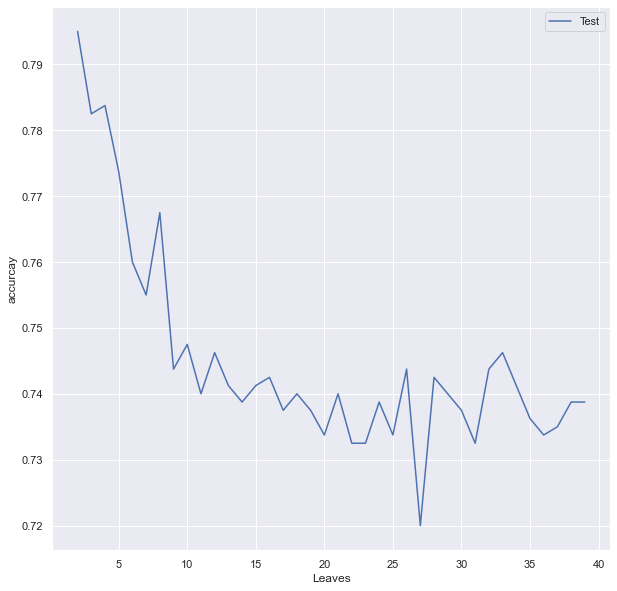

In [10]:
# Plot classification accuracy for each max_depth cv result
plot_df = pd.DataFrame(np.asarray(results), columns=['Leaves','Test']).set_index('Leaves')
plt.figure(figsize=(10,10))
sns.lineplot(data=plot_df)
plt.ylabel('accurcay');

In [11]:
display(plot_df[plot_df['Test'] == plot_df['Test'].max()])

,Test
Leaves,
2.0,0.795


In [12]:
1- 0.795


0.20499999999999996

#### (g) Produce a plot with tree size on the x-axis and cross-validated classification error rate on the y-axis.

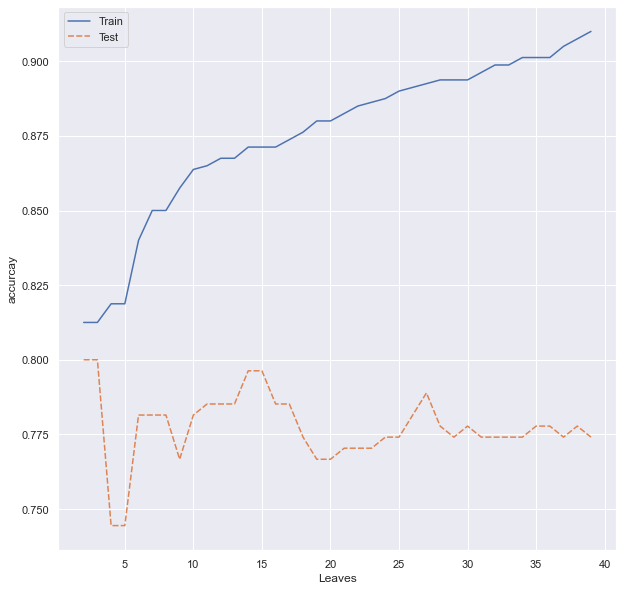

In [13]:
results = []
for mln in np.arange(2, 40):
    clf = tree.DecisionTreeClassifier(max_leaf_nodes=mln).fit(X[train],y[train])
    accuracy_train=clf.score(X[train],y[train])
    accuracy_test=clf.score(X[~train],y[~train])
    results += [[mln, accuracy_train, accuracy_test]]
    
# Plot classification accuracy for each max_leaf_nodes cv result
plot_df = pd.DataFrame(np.asarray(results), columns=['Leaves','Train','Test']).set_index('Leaves')
plt.figure(figsize=(10,10))
sns.lineplot(data=plot_df)
plt.ylabel('accurcay');

#### (h) Which tree size corresponds to the lowest cross-validated classification error rate?

In [14]:
display(plot_df[plot_df['Test'] == plot_df['Test'].max()])

,Train,Test
Leaves,,
2.0,0.8125,0.8
3.0,0.8125,0.8


#### (i) Produce a pruned tree corresponding to the optimal tree size obtained using cross-validation. If cross-validation does not lead to selection of a pruned tree, then create a pruned tree with five terminal nodes.

#### (j) Compare the training error rates between the pruned and unpruned trees. Which is higher?


#### (k) Compare the test error rates between the pruned and unpruned trees. Which is higher?

<AxesSubplot:xlabel='test', ylabel='error rate'>

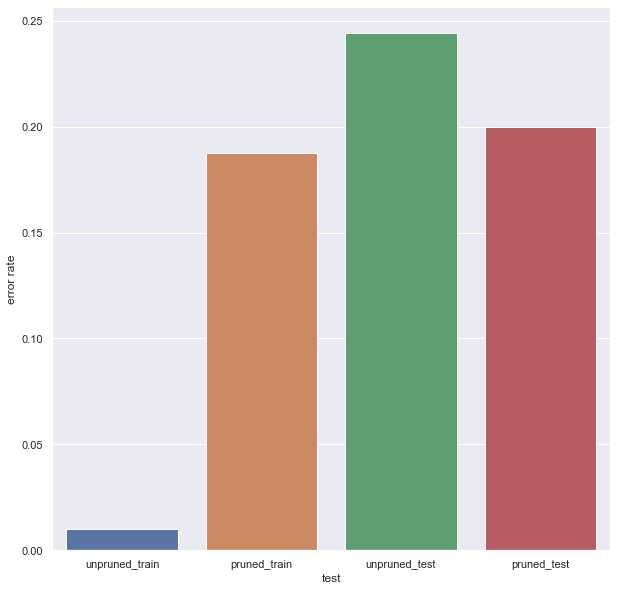

In [15]:
clf_unpruned = tree.DecisionTreeClassifier().fit(X[train],y[train])
clf_pruned = tree.DecisionTreeClassifier(max_leaf_nodes=2).fit(X[train],y[train])

scores=[['unpruned_train', 1-clf_unpruned.score(X[train],y[train])],
        ['pruned_train', 1-clf_pruned.score(X[train],y[train])],
        ['unpruned_test', 1-clf_unpruned.score(X[~train],y[~train])],
        ['pruned_test', 1-clf_pruned.score(X[~train],y[~train])]]

plot_df=pd.DataFrame(scores,columns=['test','error rate'])
plt.figure(figsize=(10,10))
sns.barplot(x='test',y='error rate', data=plot_df)